# MML para reconocer Fraudes Bancarios

Carga de librerías

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

### Preprocesamiento de los datos

In [29]:
data = pd.read_csv('../archive/Variant_init/Base.csv')

print(data.isnull().sum())
print(data.shape)

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

Tal parece el dataset no tiene valores nulos por ende no es necesario eliminar o rellenar nulos y se pasa a la verificación de *valores atípicos*.

In [31]:
# Verificar datos atípicos
print(data.describe())

           fraud_bool          income  name_email_similarity  \
count  1000000.000000  1000000.000000         1000000.000000   
mean         0.011029        0.562696               0.493694   
std          0.104438        0.290343               0.289125   
min          0.000000        0.100000               0.000001   
25%          0.000000        0.300000               0.225216   
50%          0.000000        0.600000               0.492153   
75%          0.000000        0.800000               0.755567   
max          1.000000        0.900000               0.999999   

       prev_address_months_count  current_address_months_count  \
count             1000000.000000                1000000.000000   
mean                   16.718568                     86.587867   
std                    44.046230                     88.406599   
min                    -1.000000                     -1.000000   
25%                    -1.000000                     19.000000   
50%                    -1.0

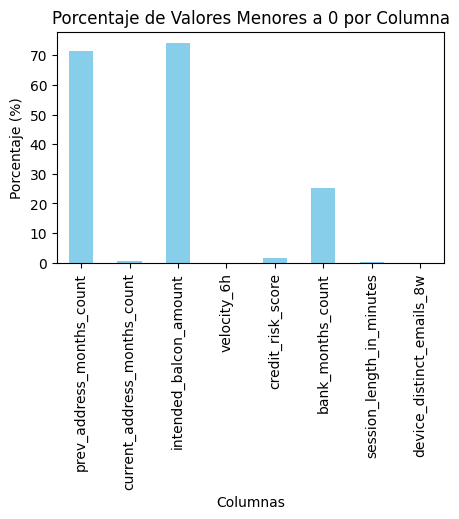

In [32]:
# Seleccionar solo las columnas numéricas
data_numeric = data.select_dtypes(include=['int64', 'float64'])

# Calcular el porcentaje de valores menores a 0 por columna
porcentajes = (data_numeric < 0).mean() * 100

# Filtrar solo las columnas que tienen valores menores a 0
porcentajes = porcentajes[porcentajes > 0]

# Gráfica
plt.figure(figsize=(5, 3))
porcentajes.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de Valores Menores a 0 por Columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje (%)')
plt.show()

In [33]:
data = data.drop(columns=["prev_address_months_count", "intended_balcon_amount"])

Gracias a "describe" y la documentación se encuentra que hay columnas con valores negativos, estos valores negativos indica que se desconoce el valor real (nulos).

Para tener una mejor visión se realiza un gráfico con solo las columnas con valores numéricos y se encuentra que las columnas *"prev_address_months_count" y "intended_balcon_amount"* tienen más del 70% de su contenido con valores negativos (nulos).

Se decide eliminar estas columnas provisoriamente por considerarlas irrelevantes.

In [34]:
# Identificar las columnas categóricas
columnas_categoricas = data.select_dtypes(include=['object']).columns

# Aplicar OneHotEncoder a las columnas categóricas
codificador = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
columnas_codificadas = codificador.fit_transform(data[columnas_categoricas])

# Resultado a DataFrame
df_codificado = pd.DataFrame(columnas_codificadas, columns=codificador.get_feature_names_out(columnas_categoricas))

# Unir el DataFrames
data = pd.concat([data.drop(columns=columnas_categoricas), df_codificado], axis=1)

data.head()

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,...,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,0.3,0.986506,25,40,0.006735,1059,13096.035018,7850.955007,6742.080561,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,0.8,0.617426,89,20,0.010095,1658,9223.283431,5745.251481,5941.664859,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0.8,0.996707,14,40,0.012316,1095,4471.472149,5471.988958,5992.555113,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0.6,0.475100,14,30,0.006991,3483,14431.993621,6755.344479,5970.336831,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0.9,0.842307,29,40,5.742626,2339,7601.511579,5124.046930,5940.734212,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 51 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   current_address_months_count      1000000 non-null  int64  
 4   customer_age                      1000000 non-null  int64  
 5   days_since_request                1000000 non-null  float64
 6   zip_count_4w                      1000000 non-null  int64  
 7   velocity_6h                       1000000 non-null  float64
 8   velocity_24h                      1000000 non-null  float64
 9   velocity_4w                       1000000 non-null  float64
 10  bank_branch_count_8w              1000000 non-null  int64  
 11  date_of_birth_distinct_emails_4w  1000

Al aplicar "OneHotEncoder" se crean nuevas columnas que remplazan las columnas categóricas y asi tener todas la columnas como numéricas

### Manejo del Desequilibrio de Clases

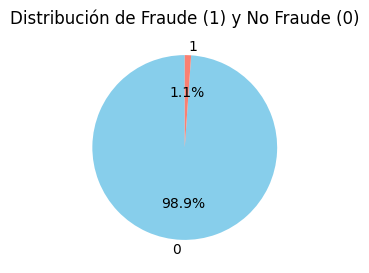

In [36]:
conteo_clases = data["fraud_bool"].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(conteo_clases, labels=conteo_clases.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribución de Fraude (1) y No Fraude (0)')
plt.show()


Al ser un dataset tan desequilibrado es necesario hacer un manejo de clases

Para este caso se decidió usar *Sobre muestreo (Undersampling)*

Este método selecciona un subconjunto de ejemplos de la clase minoritaria para que tenga la misma proporción que la clase mayoritaria.

Este método tiene sus pros y contras a tener un cuenta:

    Pros:

        * Rápido y sencillo: Fácil de implementar y computacionalmente menos costoso.

        * Elimina redundancia: Reduce el tamaño del dataset eliminando ejemplos redundantes de la clase mayoritaria.

    Contras:

        *Pérdida de información: Puede perder información valiosa de la clase mayoritaria, lo que podría afectar la precisión del modelo.

        *Riesgo de sobreajuste: Si se eliminan demasiados ejemplos de la clase mayoritaria, el modelo puede sobreajustarse a la clase minoritaria.

In [37]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

X = data.drop(columns=["fraud_bool"])
y = data["fraud_bool"]
 
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

submuestreo = RandomUnderSampler(random_state=42)
X_entrenamiento_res, y_entrenamiento_res = submuestreo.fit_resample(X_entrenamiento, y_entrenamiento)

print(y_entrenamiento_res.value_counts())


fraud_bool
0    8920
1    8920
Name: count, dtype: int64


Se pudo balancear ente fraudes y no fraudes a un 50 50 

Gradient Boosting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

modelo = GradientBoostingClassifier(random_state=42)

modelo.fit(X_entrenamiento_res, y_entrenamiento_res)

y_pred = modelo.predict(X_prueba)

print(confusion_matrix(y_prueba, y_pred))
print(classification_report(y_prueba, y_pred))


[[161763  36128]
 [   416   1693]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    197891
           1       0.04      0.80      0.08      2109

    accuracy                           0.82    200000
   macro avg       0.52      0.81      0.49    200000
weighted avg       0.99      0.82      0.89    200000



### Evaluación y Validación

Validación Cruzada

Propósito: Asegurarnos de que nuestro modelo generaliza bien y no está sobreajustado a los datos de entrenamiento.

Método: Utilizamos cross_val_score con varias particiones (e.g., cv=5) para evaluar el rendimiento del modelo en diferentes subconjuntos de datos.

In [40]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada con 5 particiones
scores = cross_val_score(modelo, X_entrenamiento_res, y_entrenamiento_res, cv=5, scoring='recall')

print("Recall en cada partición:", scores)
print("Media del recall:", scores.mean())


Recall en cada partición: [0.79988789 0.79652466 0.80717489 0.80044843 0.80829596]
Media del recall: 0.8024663677130043


Interpretación de Resultados con SHAP:

Propósito: Entender por qué el modelo está haciendo ciertas predicciones.

Método: Usamos SHAP (SHapley Additive exPlanations) para calcular los valores de Shapley y visualizarlos, lo que nos permite ver la importancia de cada característica en las predicciones del modelo.



 95%|=================== | 16978/17840 [00:18<00:00]       

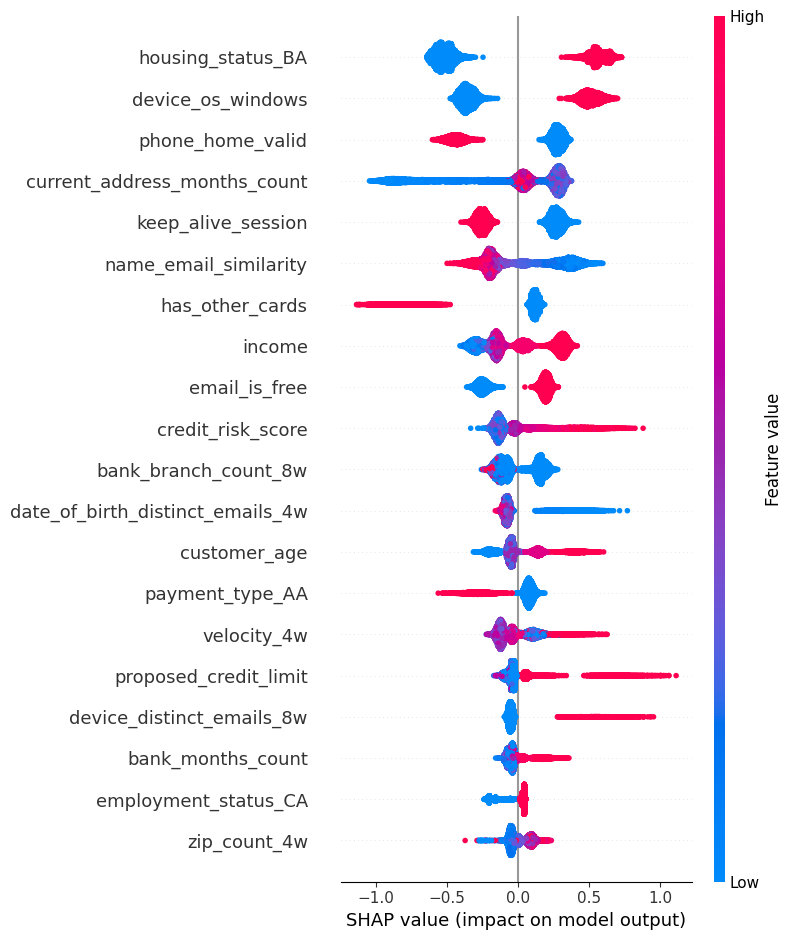

In [41]:
import shap

explainer = shap.Explainer(modelo, X_entrenamiento_res)
shap_values = explainer(X_entrenamiento_res)

shap.summary_plot(shap_values, X_entrenamiento_res)


### Implementación de el modelo con las variantes

In [42]:
import joblib

joblib.dump(modelo, 'modelo_fraudev2.pkl')

['modelo_fraudev2.pkl']

Variant 1

Precisión: 77.53%


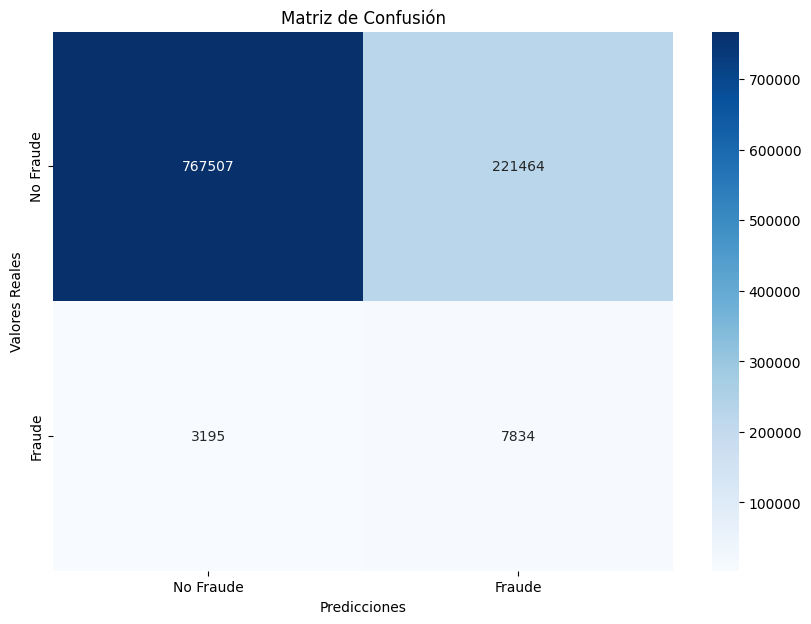

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

df_reales = pd.read_csv("../archive/Variant_init/Variant I.csv")
df_predicciones = pd.read_csv("../archive/resultados_mml/resultados_V1.csv")

# Crea un DataFrame con los resultados y las predicciones
df_resultados = pd.DataFrame({
    'fraud_bool': df_reales['fraud_bool'],
    'predicciones': df_predicciones['predicciones']  
})

matriz_confusion = confusion_matrix(df_resultados['fraud_bool'], df_resultados['predicciones'])

precision = accuracy_score(df_resultados['fraud_bool'], df_resultados['predicciones'])
print(f'Precisión: {precision*100:.2f}%')

plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()


Variant 2

Precisión: 76.48%


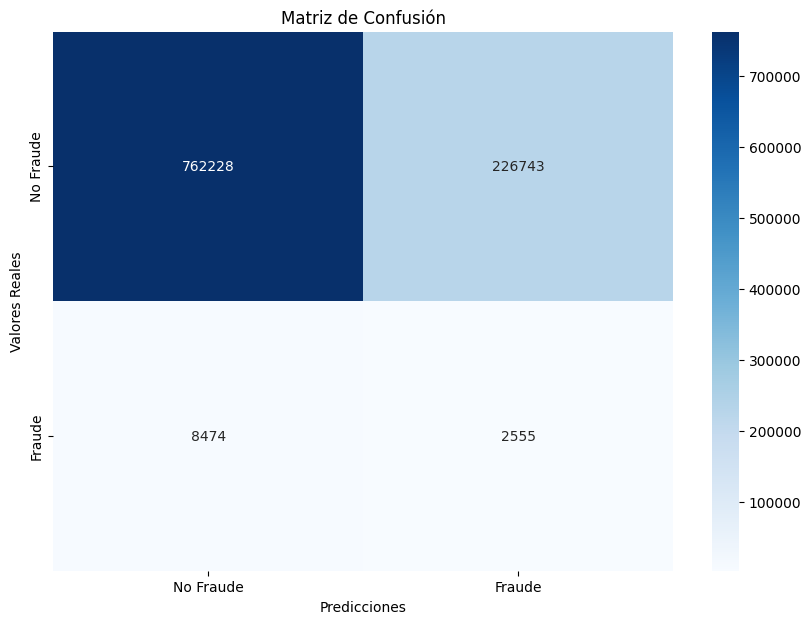

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

df_reales = pd.read_csv("../archive/Variant_init/Variant II.csv")
df_predicciones = pd.read_csv("../archive/resultados_mml/resultados_V2.csv")

# Crea un DataFrame con los resultados y las predicciones
df_resultados = pd.DataFrame({
    'fraud_bool': df_reales['fraud_bool'],
    'predicciones': df_predicciones['predicciones']  
})

matriz_confusion = confusion_matrix(df_resultados['fraud_bool'], df_resultados['predicciones'])

precision = accuracy_score(df_resultados['fraud_bool'], df_resultados['predicciones'])
print(f'Precisión: {precision*100:.2f}%')

plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()


Variant 3

Precisión: 74.11%


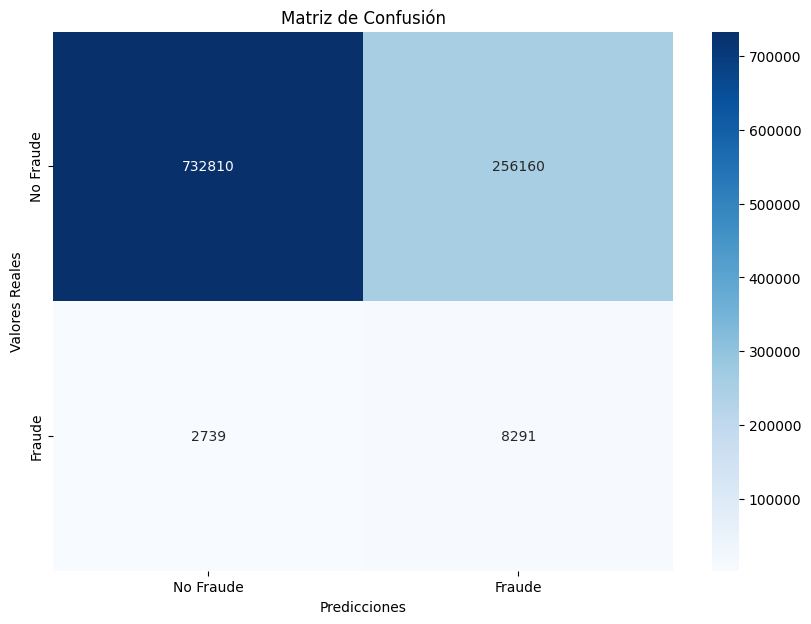

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

df_reales = pd.read_csv("../archive/Variant_init/Variant III.csv")
df_predicciones = pd.read_csv("../archive/resultados_mml/resultados_V3.csv")

# Crea un DataFrame con los resultados y las predicciones
df_resultados = pd.DataFrame({
    'fraud_bool': df_reales['fraud_bool'],
    'predicciones': df_predicciones['predicciones']  
})

matriz_confusion = confusion_matrix(df_resultados['fraud_bool'], df_resultados['predicciones'])

precision = accuracy_score(df_resultados['fraud_bool'], df_resultados['predicciones'])
print(f'Precisión: {precision*100:.2f}%')

plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()


Variant 4

Precisión: 74.16%


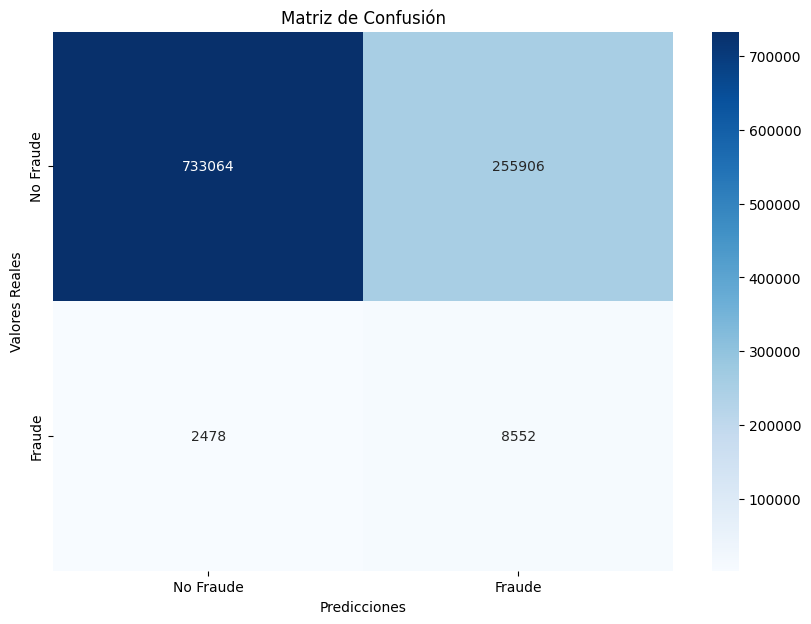

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

df_reales = pd.read_csv("../archive/Variant_init/Variant IV.csv")
df_predicciones = pd.read_csv("../archive/resultados_mml/resultados_V4.csv")

# Crea un DataFrame con los resultados y las predicciones
df_resultados = pd.DataFrame({
    'fraud_bool': df_reales['fraud_bool'],
    'predicciones': df_predicciones['predicciones']  
})

matriz_confusion = confusion_matrix(df_resultados['fraud_bool'], df_resultados['predicciones'])

precision = accuracy_score(df_resultados['fraud_bool'], df_resultados['predicciones'])
print(f'Precisión: {precision*100:.2f}%')

plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()


Variant 5

Precisión: 74.17%


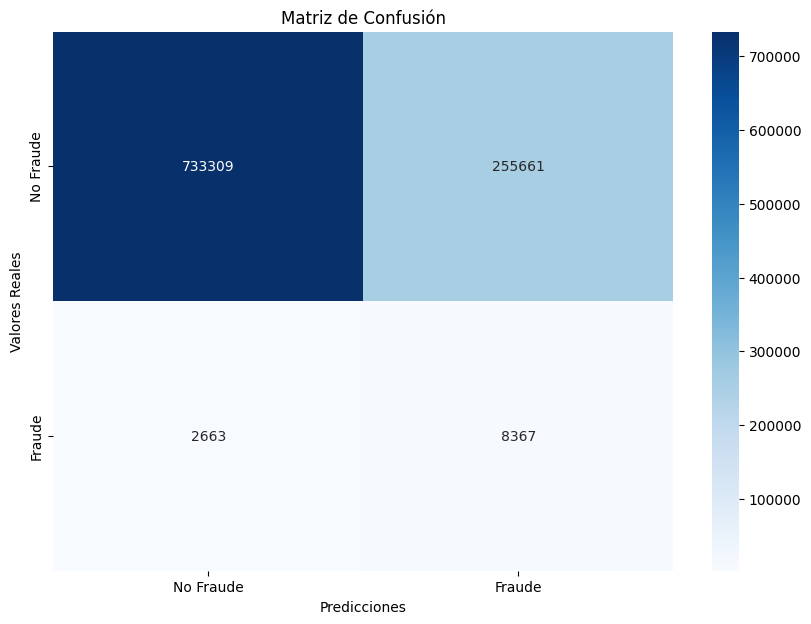

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

df_reales = pd.read_csv("../archive/Variant_init/Variant V.csv")
df_predicciones = pd.read_csv("../archive/resultados_mml/resultados_V5.csv")

# Crea un DataFrame con los resultados y las predicciones
df_resultados = pd.DataFrame({
    'fraud_bool': df_reales['fraud_bool'],
    'predicciones': df_predicciones['predicciones']  
})

matriz_confusion = confusion_matrix(df_resultados['fraud_bool'], df_resultados['predicciones'])

precision = accuracy_score(df_resultados['fraud_bool'], df_resultados['predicciones'])
print(f'Precisión: {precision*100:.2f}%')

plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()
